# Homework #7 - Bento-Prooduction
Goal: how to build and test an ML production service with BentoML

## Background

You are a new recruit at ACME corp. Your manager is emailing you about your first assignment.

In [3]:
# oowww yeeaaa never thought i'd get hired in data field

## Email from your manager

Good morning recruit! It's good to have you here! I have an assignment for you. I have a data scientist that's built a credit risk model in a jupyter notebook. I need you to run the notebook and save the model with BentoML and see how big the model is. If it's greater than a certain size, I'm going to have to request additional resources from our infra team. Please let me know how big it is.

Thanks,

Mr McManager

In [2]:
# sir yes sir

## Question 1

-   Install BentoML
-   What's the version of BentoML you installed?
-   Use `--version` to find out

In [4]:
# Install BentoML
!pip install bentoml

     -------------------------------------- 858.3/858.3 kB 2.3 MB/s eta 0:00:00
     -------------------------------------- 182.7/182.7 kB 3.7 MB/s eta 0:00:00
  Using cached uvicorn-0.18.3-py3-none-any.whl (57 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached cattrs-22.2.0-py3-none-any.whl (35 kB)
  Using cached fs-2.4.16-py2.py3-none-any.whl (135 kB)
  Using cached PyYAML-6.0-cp39-cp39-win_amd64.whl (151 kB)
     ---------------------------------------- 81.9/81.9 kB 2.2 MB/s eta 0:00:00
  Using cached cloudpickle-2.2.0-py3-none-any.whl (25 kB)
  Using cached python_dotenv-0.21.0-py3-none-any.whl (18 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
     ---------------------------------------- 64.0/64.0 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
     ---------------------------------------- 50.9/50.9 kB ? eta 0:00:00
     -------------------------------------- 323.5/323.5 kB 3.3 MB/s eta 0:00:00
    

In [5]:
# What's the version of BentoML you installed
!bentoml --version

bentoml, version 1.0.7


In [8]:
import bentoml
from bentoml.io import JSON

## Question 2

Run the notebook from module 6 and save the credit risk model with BentoML

How big approximately is the saved BentoML model?

-   924kb
-   724kb
-   114kb **< - closest answer**
-   8kb

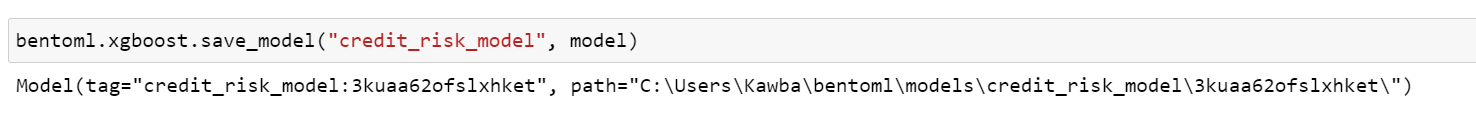
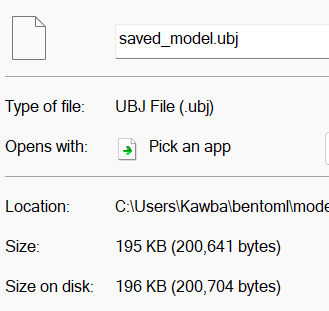
196KB

## Another email from your manager

Great job recruit! Looks like I won't be having to go back to the procurement team. Thanks for the information.

However, I just got word from one of the teams that's using one of our ML services and they're saying our service is "broken" and their trying to blame our model. I looked at the data their sending and it's completely bogus. I don't want them to send bad data to us and blame us for our models. Could you write a pydantic schema for the data that they should be sending? That way next time it will tell them it's their data that's bad and not our model.

Thanks,

Mr McManager


In [12]:
# your wish, my command

## Question 3

Say you have the following data that you're sending to your service:

{
  "name": "Tim",
  "age": 37,
  "country": "US",
  "rating": 3.14
}

What would the pydantic class look like? You can name the class `UserProfile`.

In [16]:
from pydantic import BaseModel

In [18]:
class UserProfile(BaseModel):
    name: str
    age: int
    country: str
    rating: float

## Email from your CEO

Good morning! I hear you're the one to go to if I need something done well! We've got a new model that a big client needs deployed ASAP. I need you to build a service with it and test it against the old model and make sure that it performs better, otherwise we're going to lose this client. All our hopes are with you!

Thanks,

CEO of Acme Corp

In [19]:
# really popular, ain't I?

## Question 4

We've prepared a model for you that you can import using:

curl -O https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel.bentomodel
bentoml models import coolmodel.bentomodel

What version of scikit-learn was this model trained with?

-   1.1.1 **<-Answer**
-   1.1.2
-   1.1.3
-   1.1.4
-   1.1.5

In [20]:
!curl -O https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel.bentomodel

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  1724    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  1724  100  1724    0     0   1683      0  0:00:01  0:00:01 --:--:--  1685


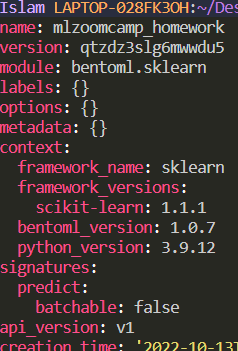

## Question 5

Create a bento out of this scikit-learn model. This will require installing scikit-learn like this:

pip install scikit-learn

Hint: The output type for this endpoint should be NumpyNdarray()

Send this array to the bento:

```
[[6.4,3.5,4.5,1.2]]
```

You can use curl or the Swagger UI. What value does it return?

-   0
-   1 **<- Answer**
-   2
-   3

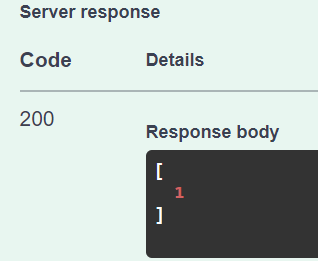

## Question 6

Ensure to serve your bento with `--production` for this question

Install locust using:

pip install locust

Use the following locust file: [locustfile.py](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/07-bento-production/locustfile.py)

Ensure that it is pointed at your bento's endpoint (In case you didn't name your endpoint "classify")

[![](https://github.com/alexeygrigorev/mlbookcamp-code/raw/master/course-zoomcamp/cohorts/2022/07-bento-production/resources/classify-endpoint.png)](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/07-bento-production/resources/classify-endpoint.png)

Configure 100 users with ramp time of 10 users per second. Click "Start Swarming" and ensure that it is working

Now download a second model with this command:

curl -O https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel2.bentomodel

Or you can download with this link as well: [https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel2.bentomodel](https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel2.bentomodel)

Now import the model:

bentoml models import coolmodel2.bentomodel

Update your bento's runner tag and test with both models. Which model allows more traffic (more throughput) as you ramp up the traffic? Remember to turn off and turn on your bento service between changing the model tag. Use Ctl-C to close the service. Then call bentoml serve

Test out the first model and the second model, which one performance better at higher volumes?

-   The first model
-   The second model

In [ ]:
#Install locust
!pip install locust

In [23]:
!wget https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/07-bento-production/locustfile.py

--2022-10-17 18:18:20--  https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/07-bento-production/locustfile.py
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'locustfile.py'

     0K .......... .......... .......... .......... ..........  489K
    50K .......... .......... .......... .......... ..........  921K
   100K .......... .......... .......... .......... .......... 3.67M
   150K ..........                                             5.32M=0.2s

2022-10-17 18:18:21 (933 KB/s) - 'locustfile.py' saved [164008]



In [24]:
!curl -O https://s3.us-west-2.amazonaws.com/bentoml.com/mlzoomcamp/coolmodel2.bentomodel

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1728  100  1728    0     0   1676      0  0:00:01  0:00:01 --:--:--  1677


Model 1 @ 300 user/50 user per sec
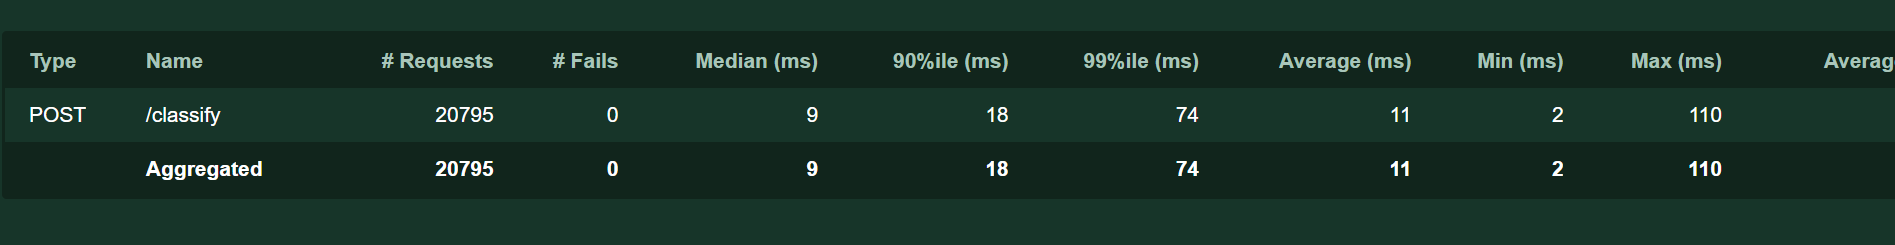

Model 2
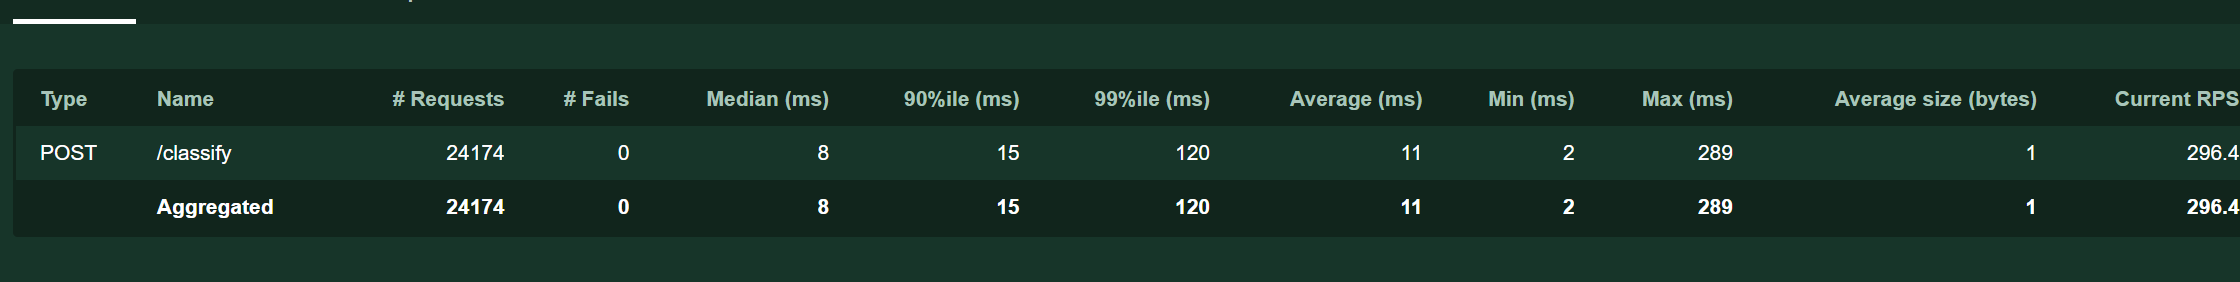

**They appear to be about the same. I have completely shut down both platforms between attempts and refreshing the tags. I also tried higher loads (300/50persec)** 
<br> I will be picking Model 1 as it has less spikes.
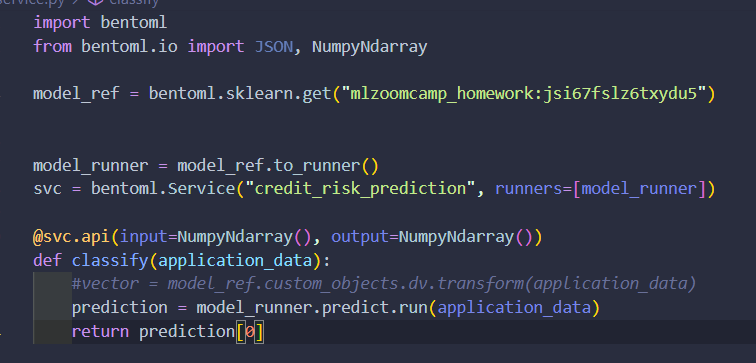
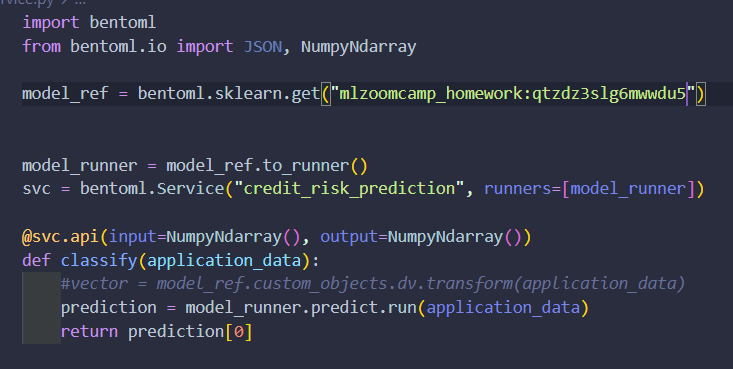

## [](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/07-bento-production/homework.md#email-from-marketing)Email from marketing

Hello ML person! I hope this email finds you well. I've heard there's this cool new ML model called Stable Diffusion. I hear if you give it a description of a picture it will generate an image. We need a new company logo and I want it to be fierce but also cool, think you could help out?

Thanks,

Mike Marketer

## Question 7 (optional)

Go to this Bento deployment of Stable Diffusion: http://54.176.205.174/ (or deploy it yourself)

Use the txt2image endpoint and update the prompt to: "A cartoon dragon with sunglasses". 
Don't change the seed, it should be 0 by default

What is the resulting image?

### #1

[![](https://github.com/alexeygrigorev/mlbookcamp-code/raw/master/course-zoomcamp/cohorts/2022/07-bento-production/resources/dragon1.jpeg)](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/07-bento-production/resources/dragon1.jpeg)

### [](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/07-bento-production/homework.md#2)#2

[![](https://github.com/alexeygrigorev/mlbookcamp-code/raw/master/course-zoomcamp/cohorts/2022/07-bento-production/resources/dragon2.jpeg)](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/07-bento-production/resources/dragon2.jpeg)

### [](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/07-bento-production/homework.md#3)#3

[![](https://github.com/alexeygrigorev/mlbookcamp-code/raw/master/course-zoomcamp/cohorts/2022/07-bento-production/resources/dragon3.jpeg)](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/07-bento-production/resources/dragon3.jpeg)

### [](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/07-bento-production/homework.md#4)#4

[![](https://github.com/alexeygrigorev/mlbookcamp-code/raw/master/course-zoomcamp/cohorts/2022/07-bento-production/resources/dragon4.jpeg)](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/07-bento-production/resources/dragon4.jpeg)

**#3 is the answer**